# Report 3

## Basic Graph Algorithms

#### Marcin Kapiszewski 156048
#### Adam Tomys 156057

Group 2

### Compared diraph representations:

1. Incidence matrix:
    - Matrix consists of vertices (rows), arcs (columns), and values(cells)
    - Values:
        - 1 means the head of the arc
        - 0 means that the arc is not connected to that node
        - -1 means the tail of the arc
2. Adjacency matrix:
    - Matrix consists of starting vertices (rows), ending vertices (columns), and values(cells)
    - Values:
        - 1 means that the given arc from tail to head exists
        - 0 means that the given arc from tail to head does not exist
        - -1 means that there is an arc from ending vertice to starting vertice (this value is not required)
3. Arc list:
    - The list contains entires containing arcs
    - arc is represented as a tuple containing the tail and the head
4. Adjacency list:
    - It consists of one node for each vertice
    - Each node contains all of the successors of the vertice
    - Its possible to store all precessors too but as an additional list
5. Forward star (in our case uses built in hashtable):
    - It is the same as the previos one, but instead of storing successors in a list it uses an AVL tree (in our case) or hashtable

### Implementation Difficulties:
NO difficulties

### DAG Generation:
We generate a matrix that represents arcs between vertices. Each vertice has arcs going into every other vertice with a bigger index. The probability that each of these arcs exists is equal to the saturation. Then we swap indexes of each vertice and rearrange the matrix so the new order will be applied.
This generated matrix is a representation of a DAG.

### Memory Comparision:
V - number of vertices, A - number of arcs
1. Incidence matrix:
    - V * A
    - stores bools or small signed integers (if -1 is used to represent the tail)
2. Adjacency matrix:
    - V * V
    - stores bools or small signed integers (if -1 is used to represent "reversed" arc)
3. Arc list:
    - 2 * A
    - stores ids of heads and tails, typically represented by integers
4. Adjacency list:
    - V + E
    - stores ids of heads and tails, typically represented by integers
5. Forward star (in our case uses built in hashtable):
    - V + E
    - stores ids of heads and tails, typically represented by integers

### Compared topological sorts:

1. Inspired by Kahn algorithm:
    - First we count for each node the number of predecessors
    - We initalize an output list, a number of visited nodes as 0, and a queue containing all vertices that do not have any predecessors
    - While our queue is not empty:
        - Increment visited nodes by one
        - Remove a vertice from queue and add it to the output
        - For each successor of dequeued node:
            - Decrease their number of predecessors by one
            - If the number is now 0 add it to the queue
    - If the number of visisted nodes is diffrent than the number of all nodes it is not possible to sort this graph and an error or message should be returned
    - Otherwise return out output list
2. Making use of DFS (graph coloring):
    - Our code used recursion for this
    - First we initialize a stack as our output and a set for visited nodes
    - Now we iterate over every node:
        - If it was not visited already we call our helper function dfs
    - At the end we return out stack as a list (stack was used for fast pushing new values on the left)

    - Our helper dfs function:
        - It takes the graph, the current node, the set of visited nodes, and the output stack as arguments
        - It adds the node to the visited set
        - For each successors of the node if that successor was not visited it calls dfs again
        - At the end the current node is pushed to the left of the stack

In [9]:
from glob import glob
from IPython.display import Image, display

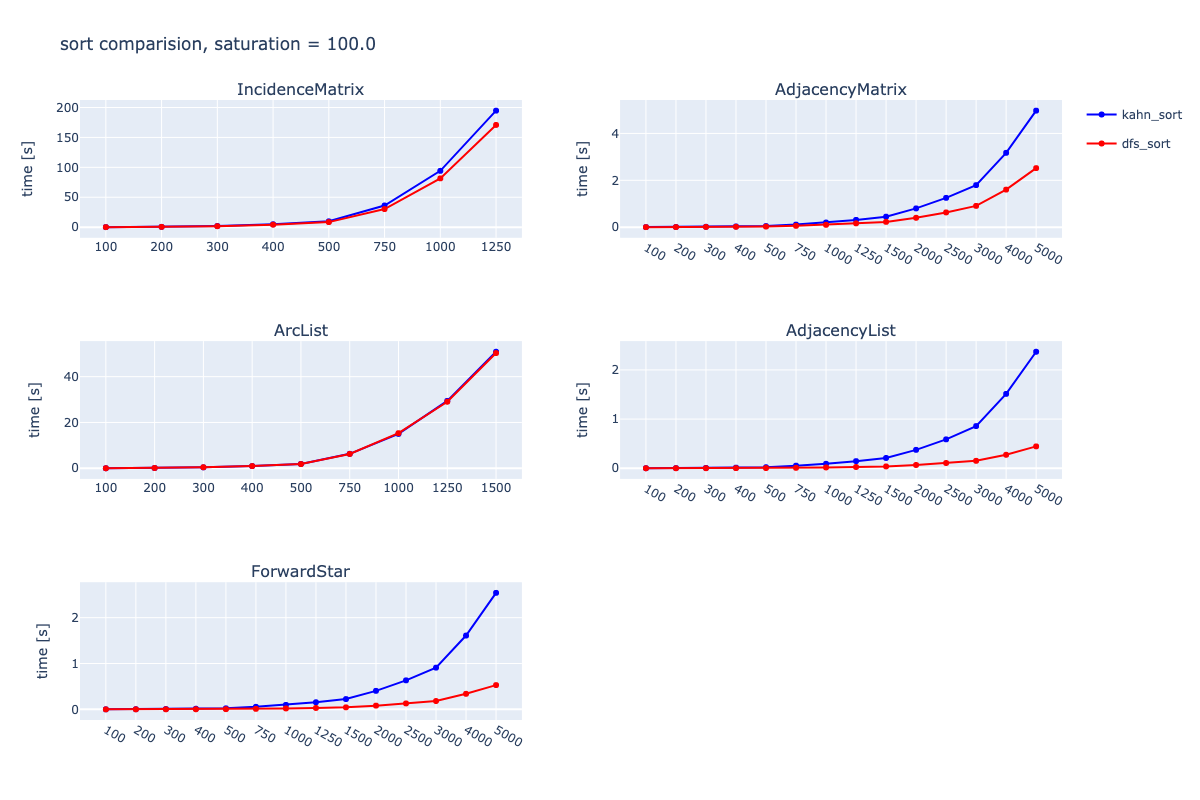

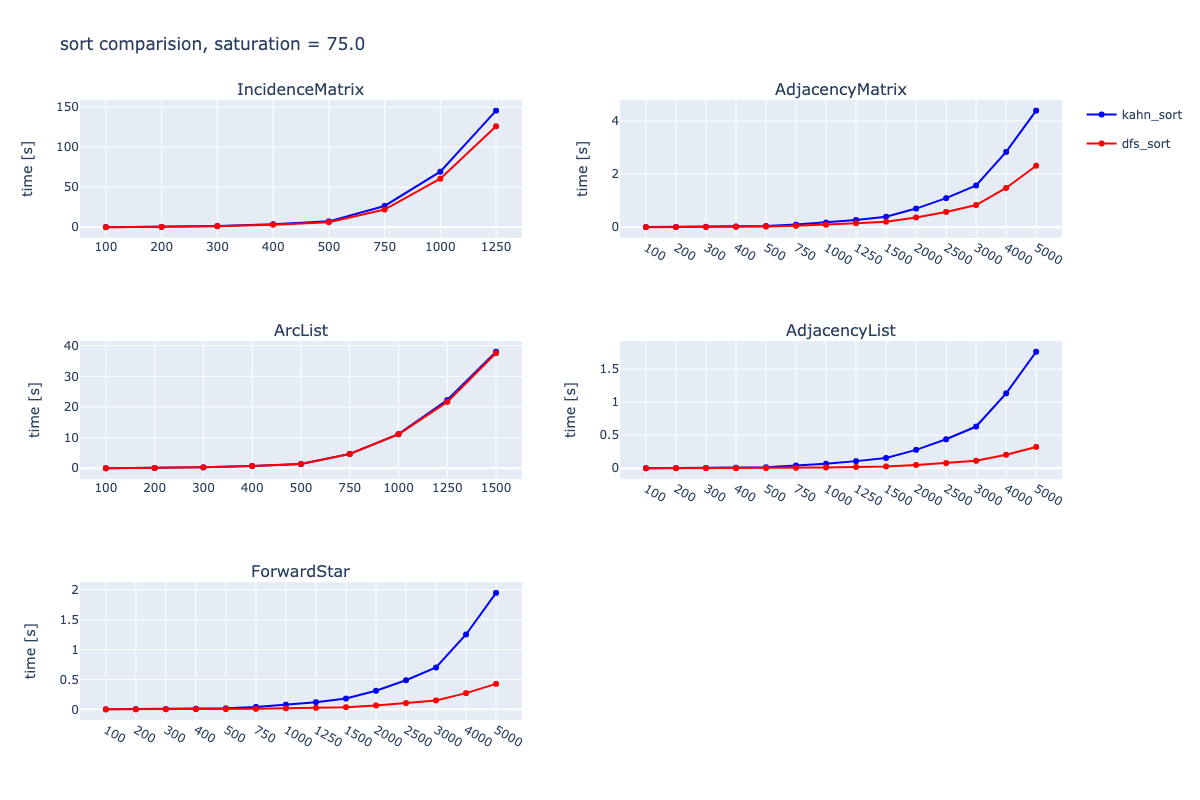

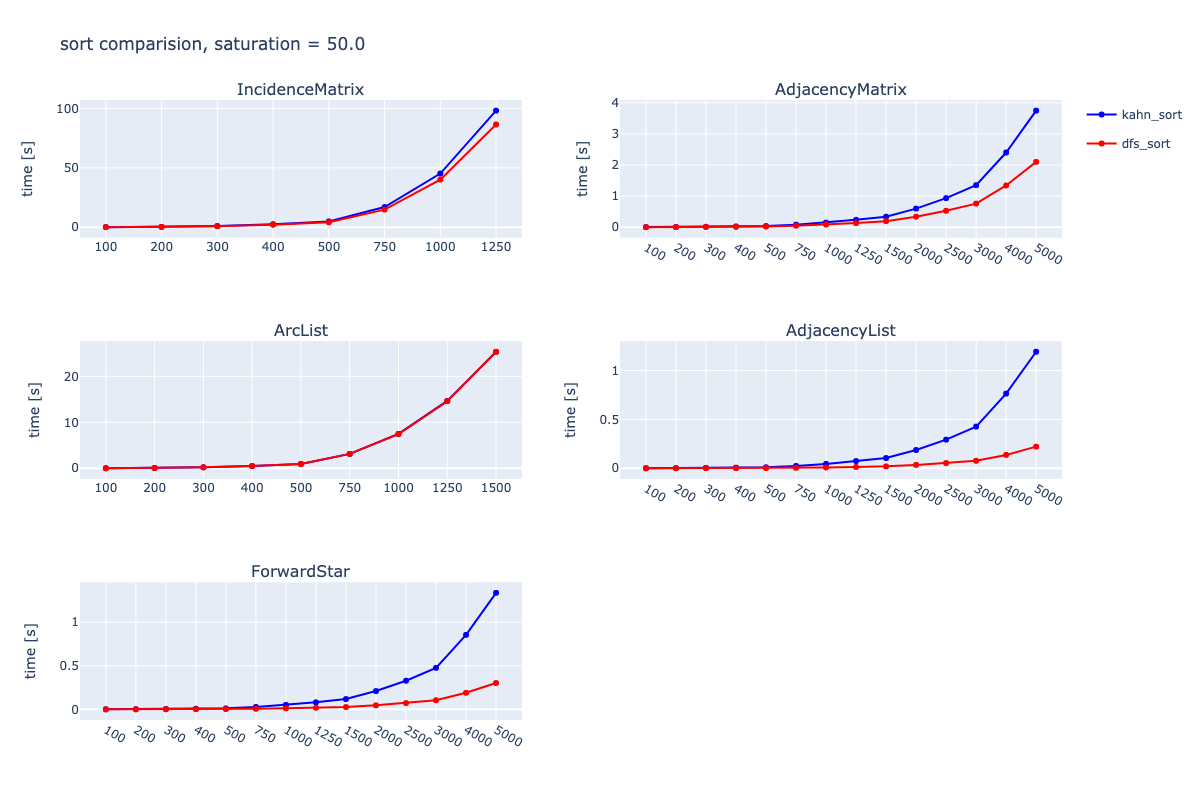

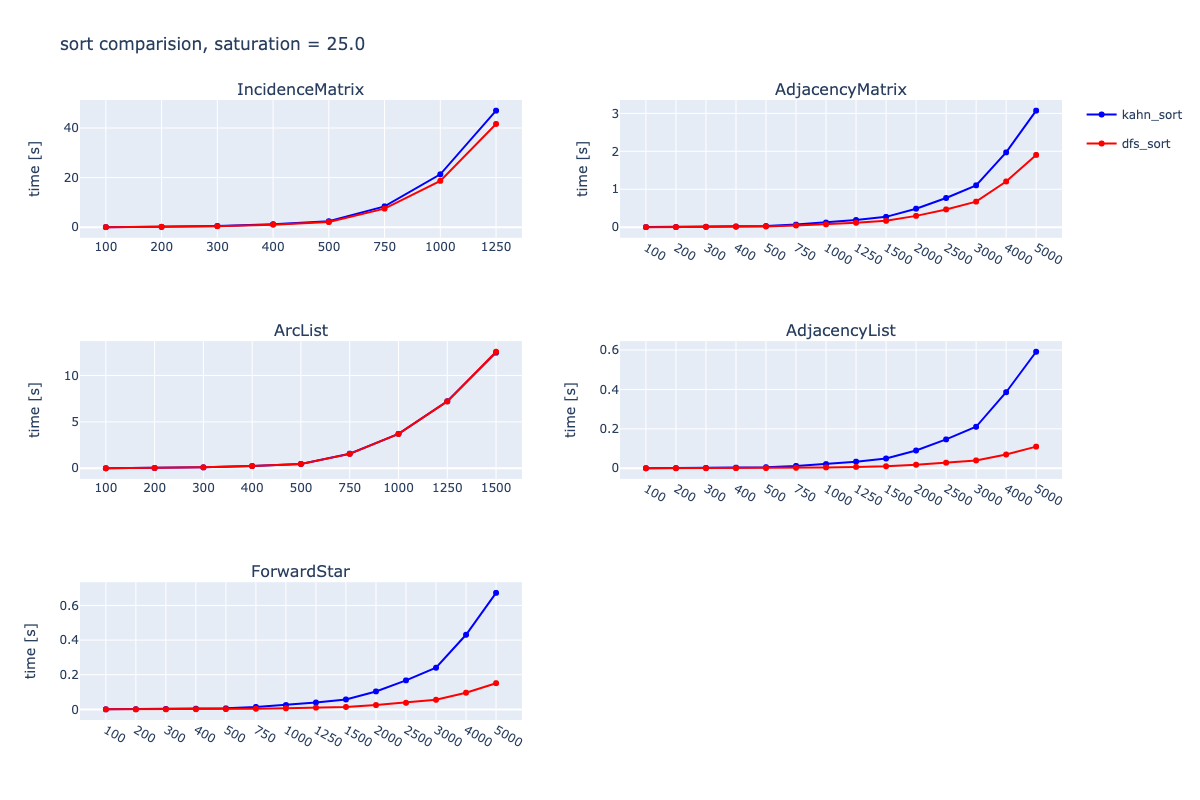

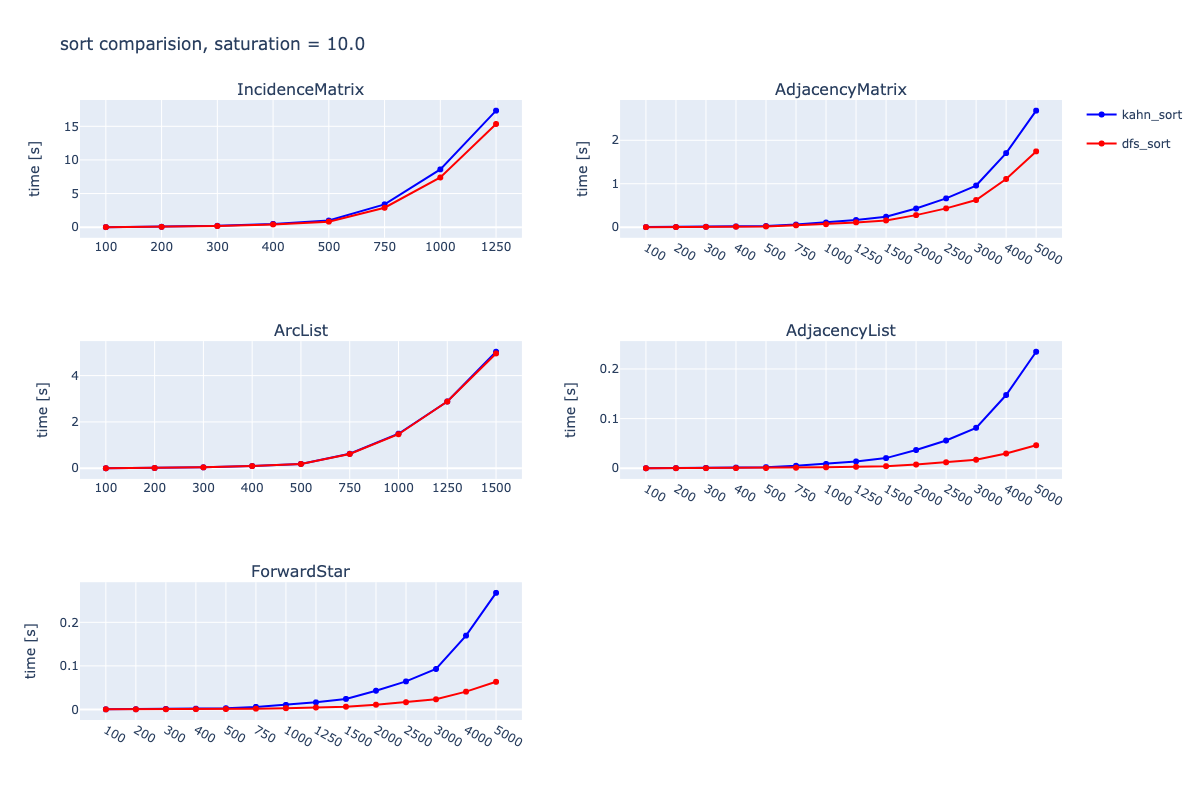

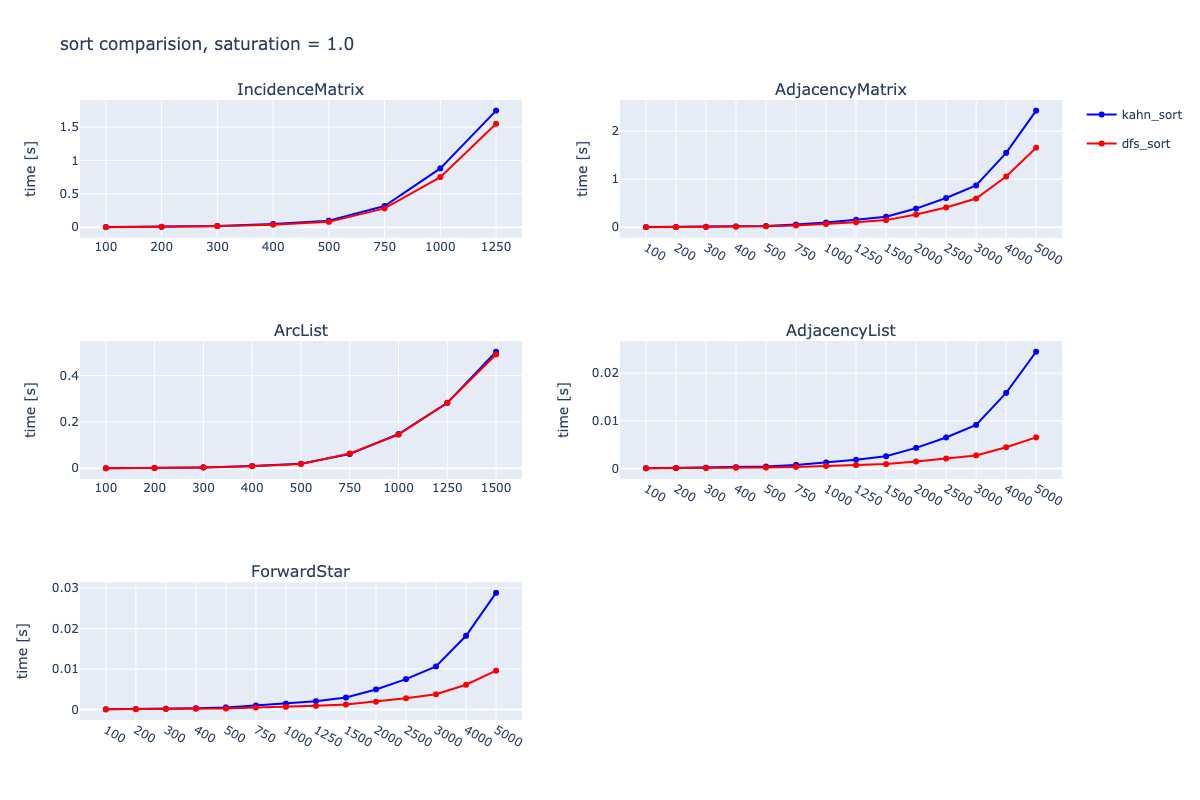

In [10]:
# sort comparision
paths = glob("graphs/sort comparision*")
paths.sort(key = lambda x: float(x.split()[-1].strip(".png")), reverse=True)
for path in paths:
    display(Image(path))

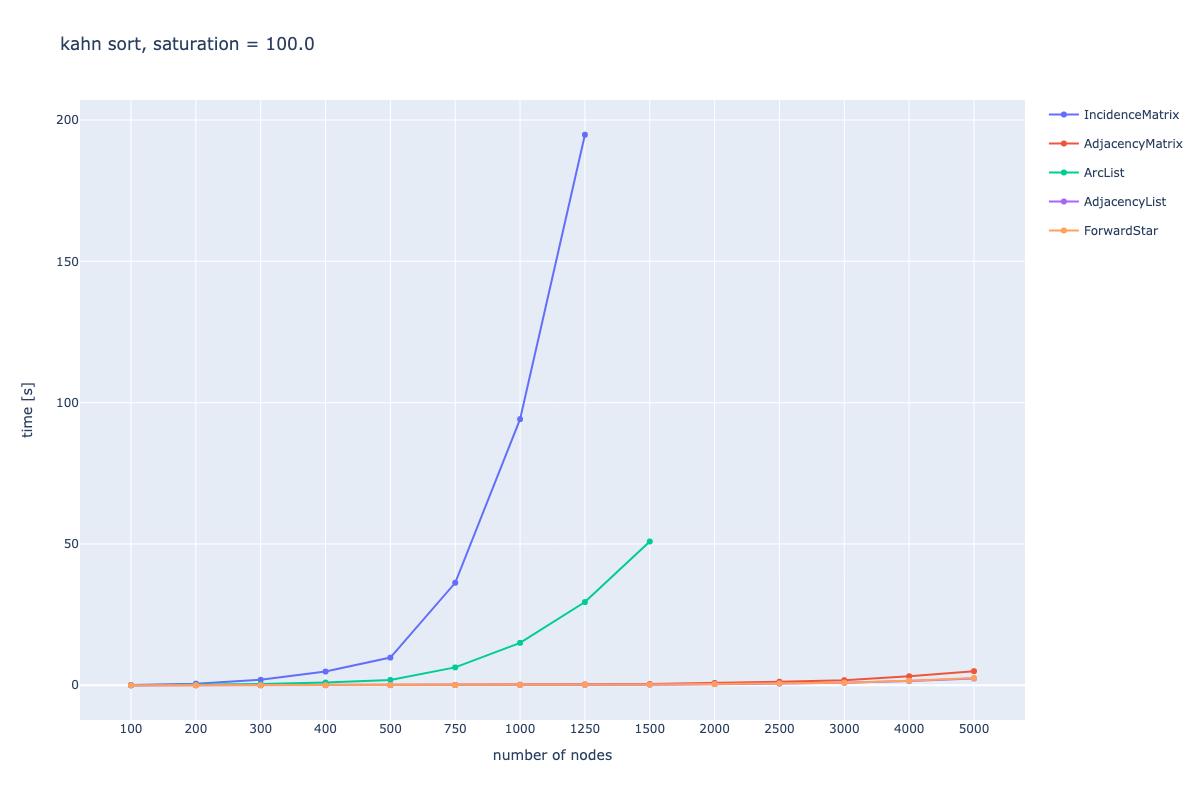

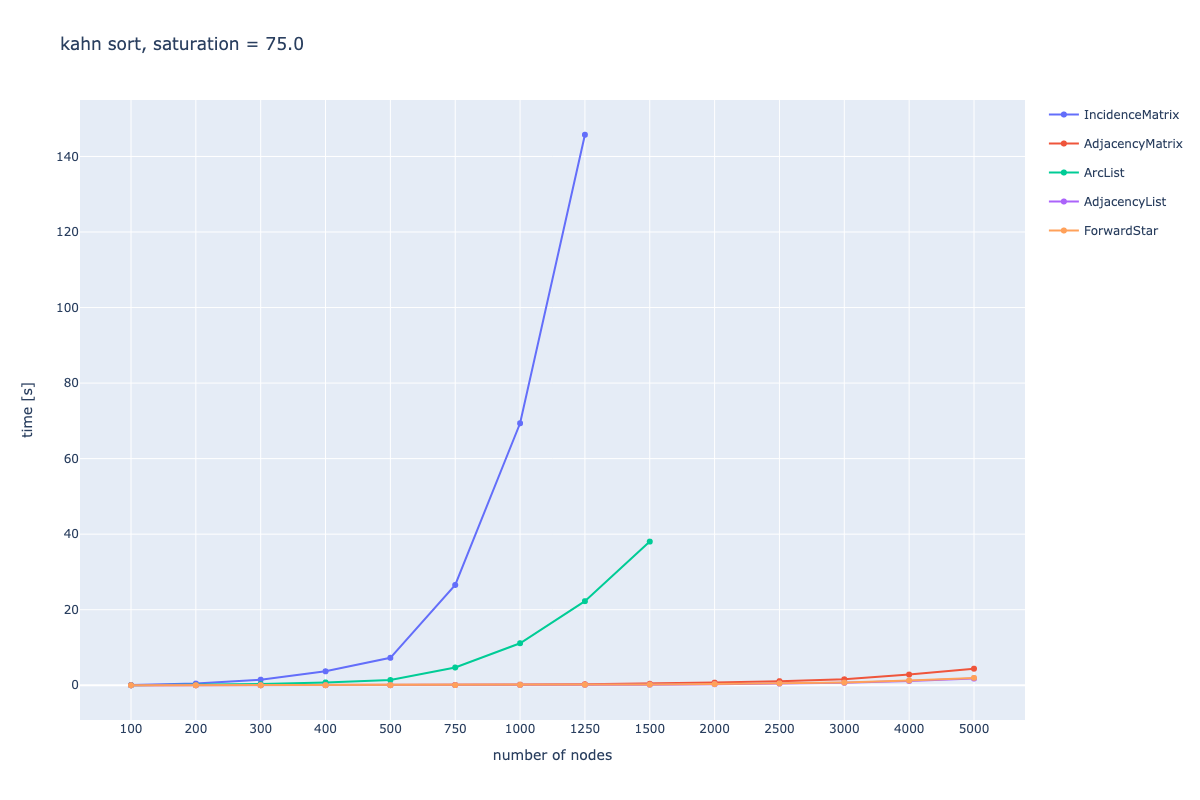

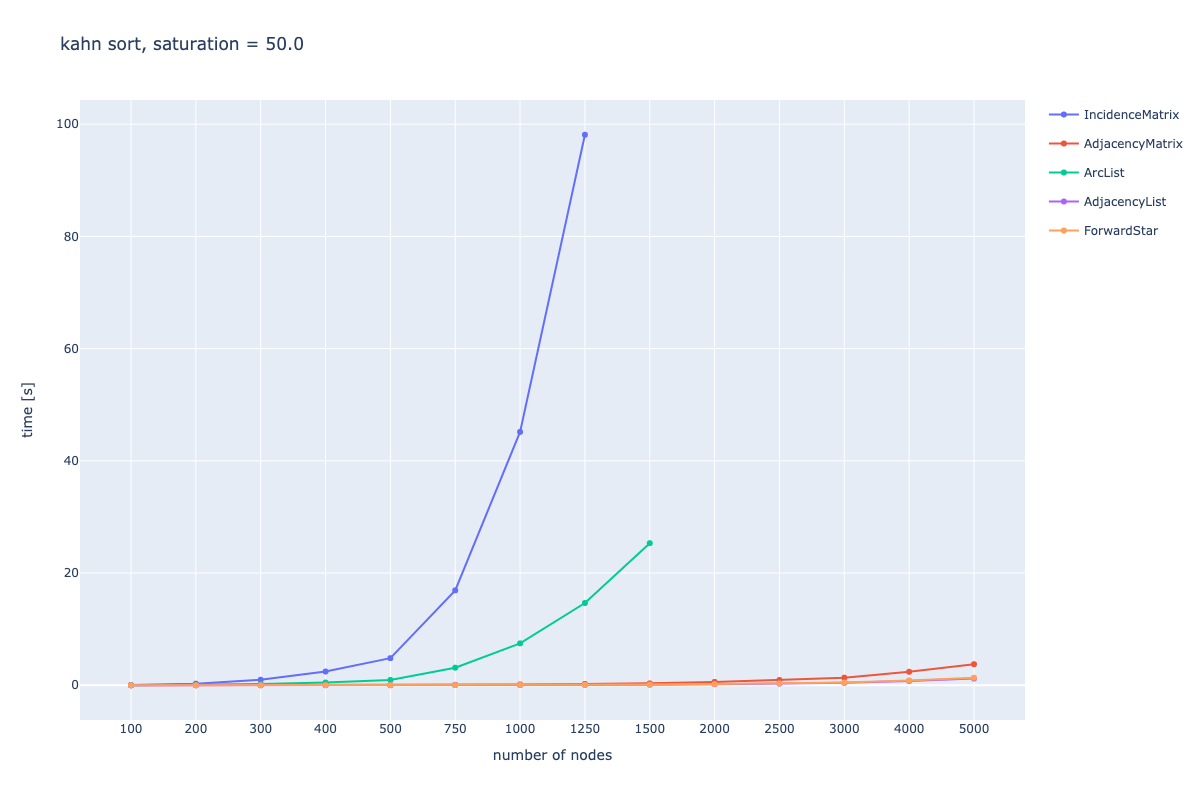

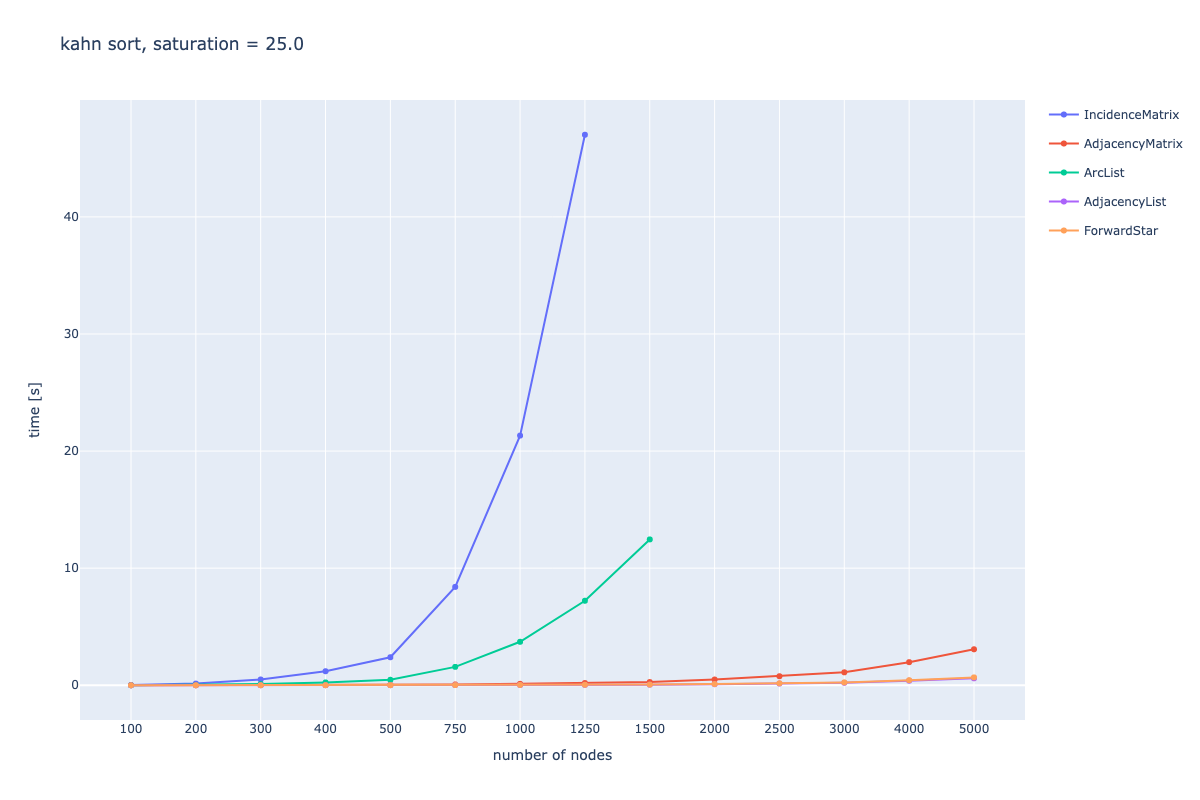

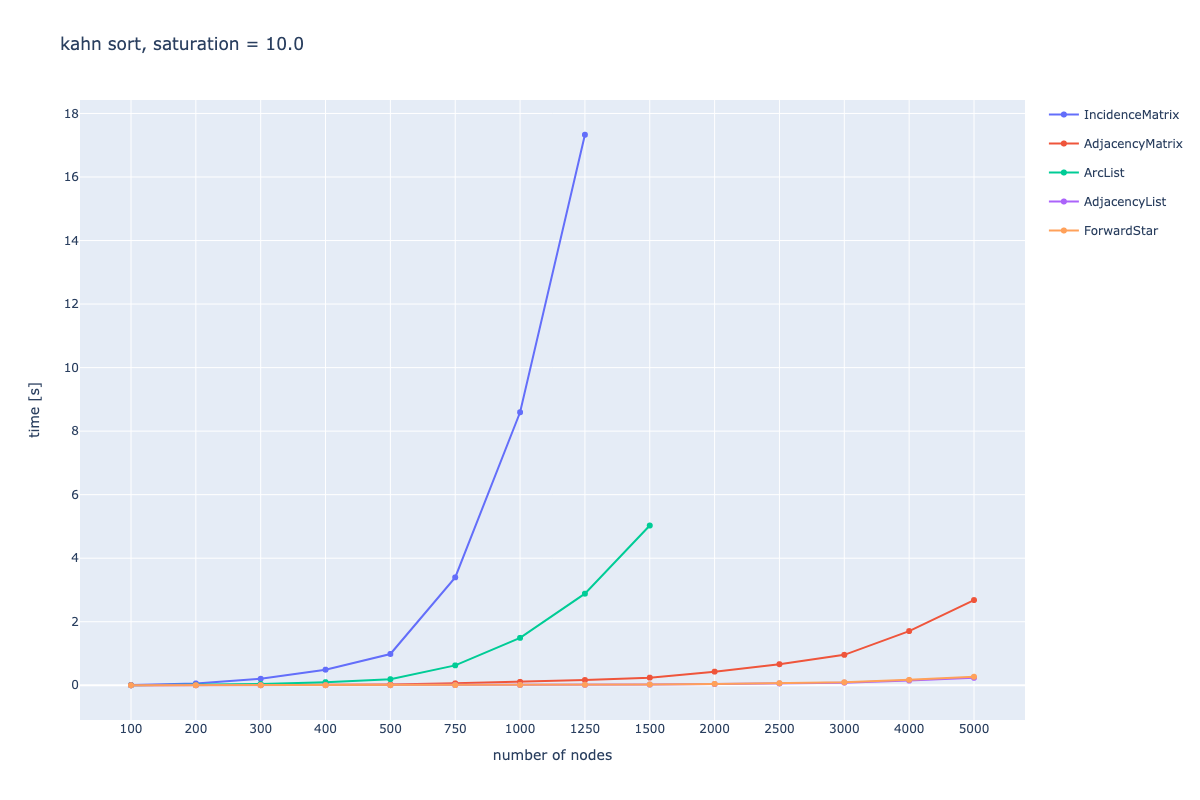

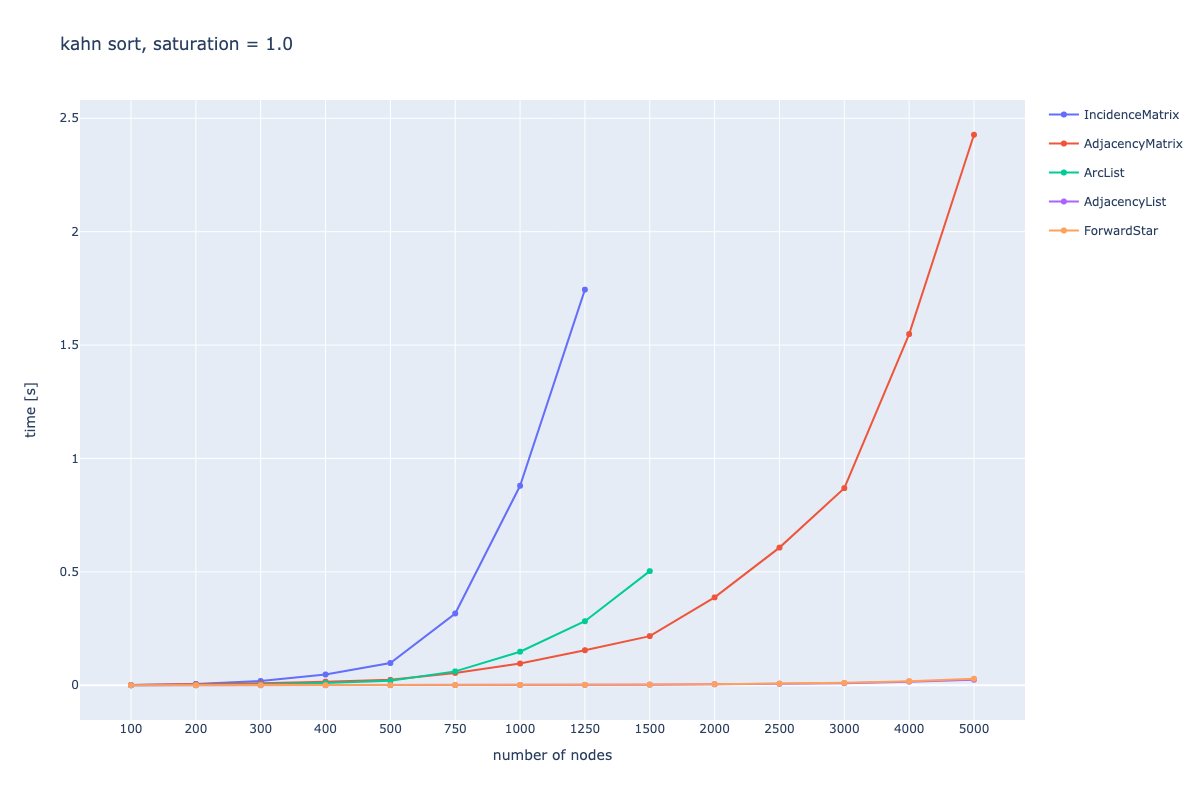

In [11]:
#kahn sort
paths = glob("graphs/kahn sort*")
paths.sort(key = lambda x: float(x.split()[-1].strip(".png")), reverse=True)
for path in paths:
    display(Image(path))

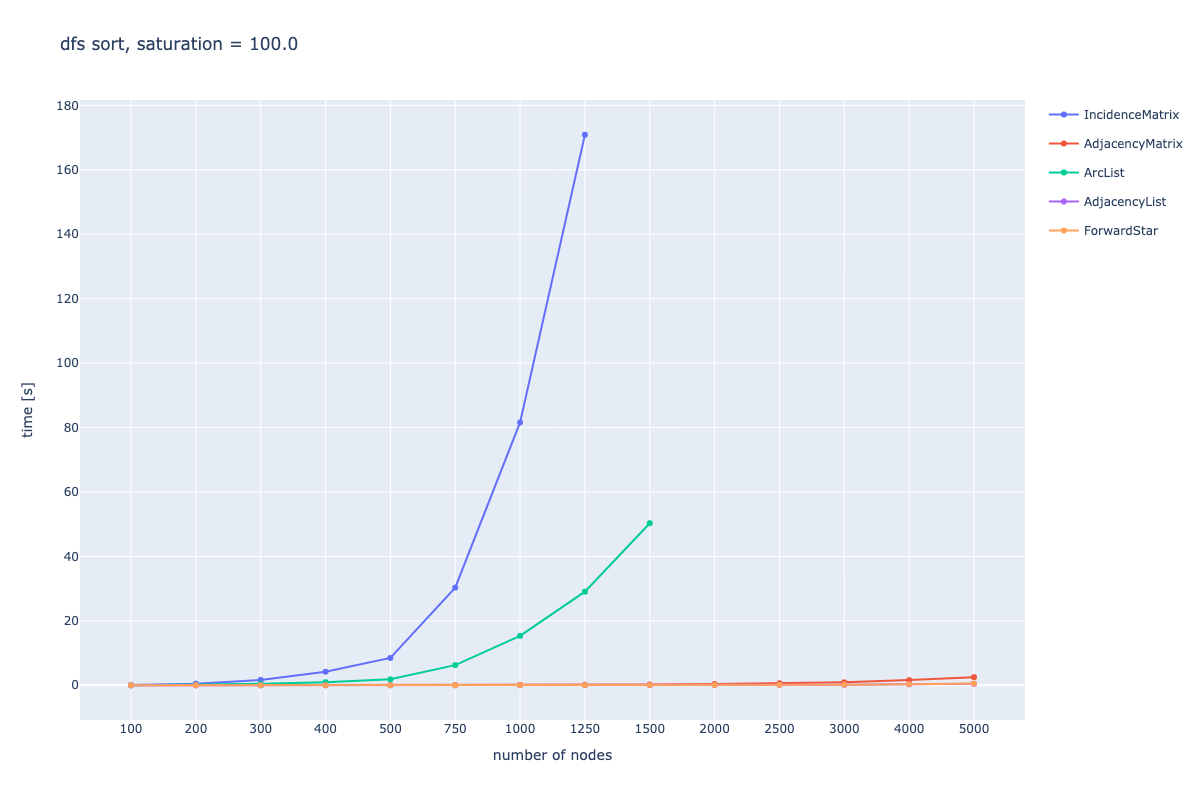

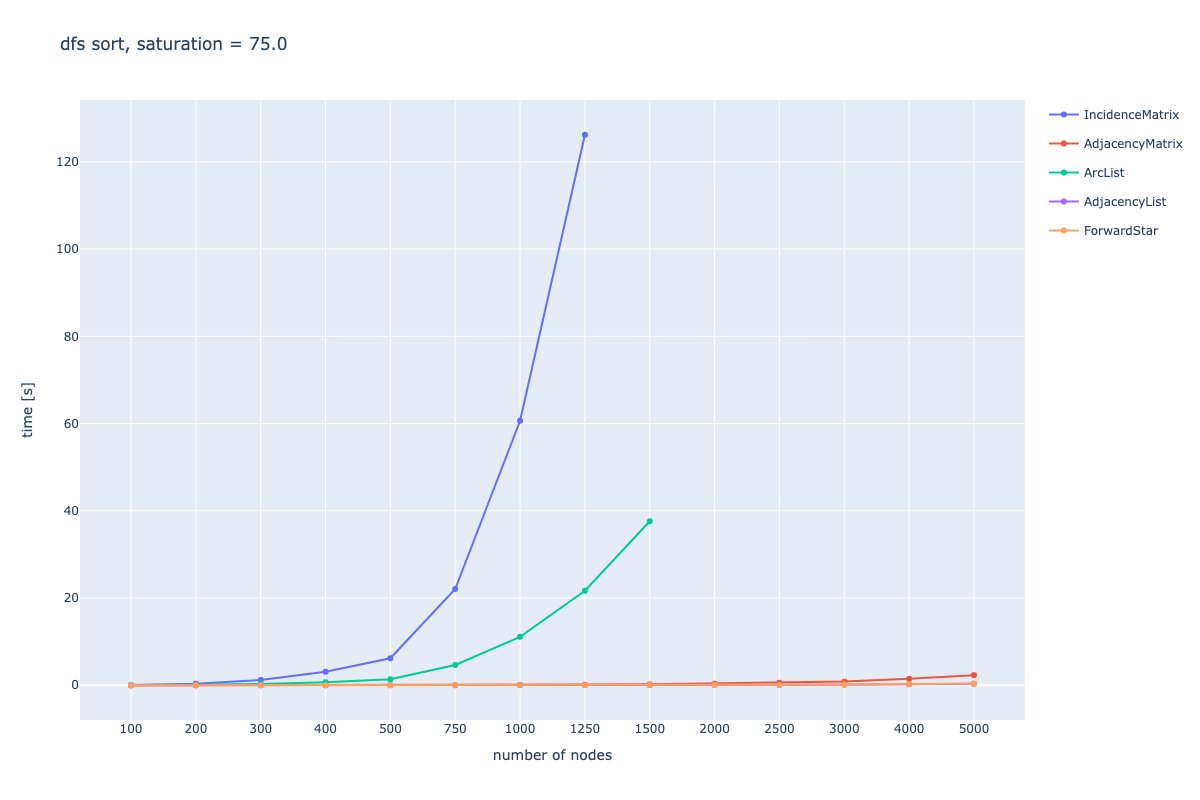

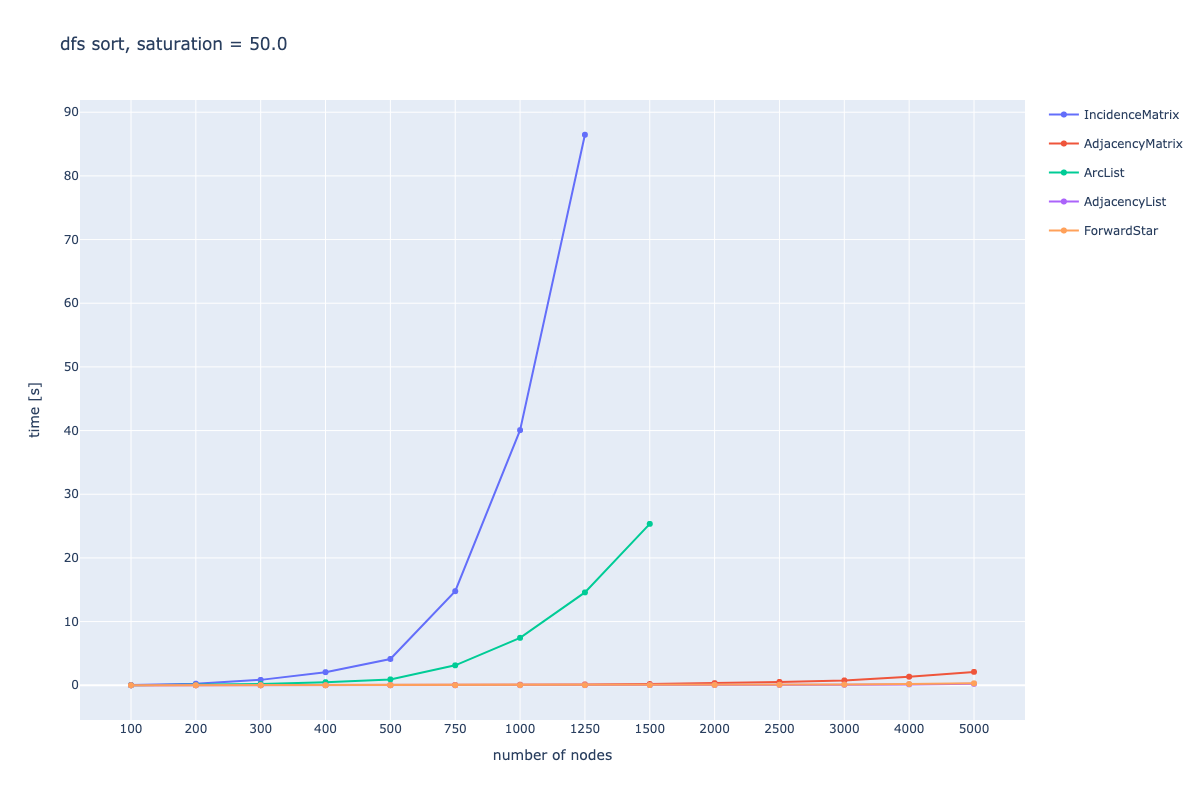

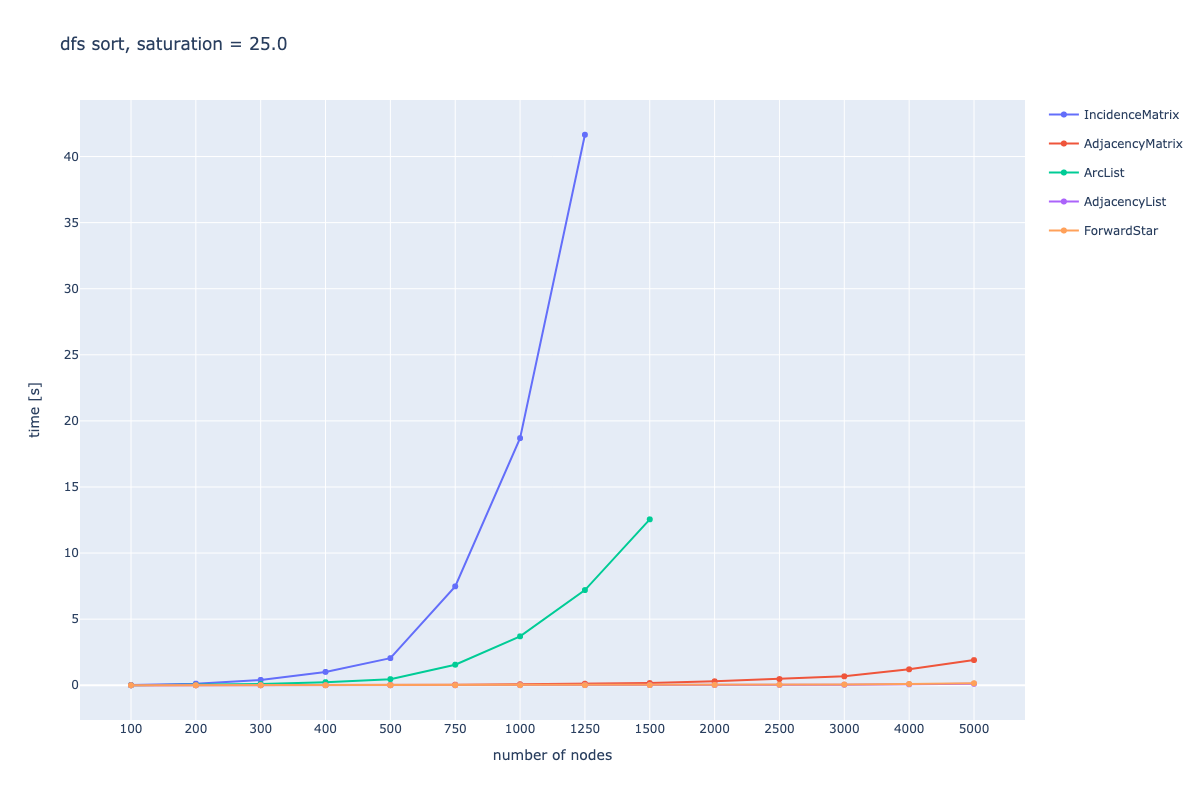

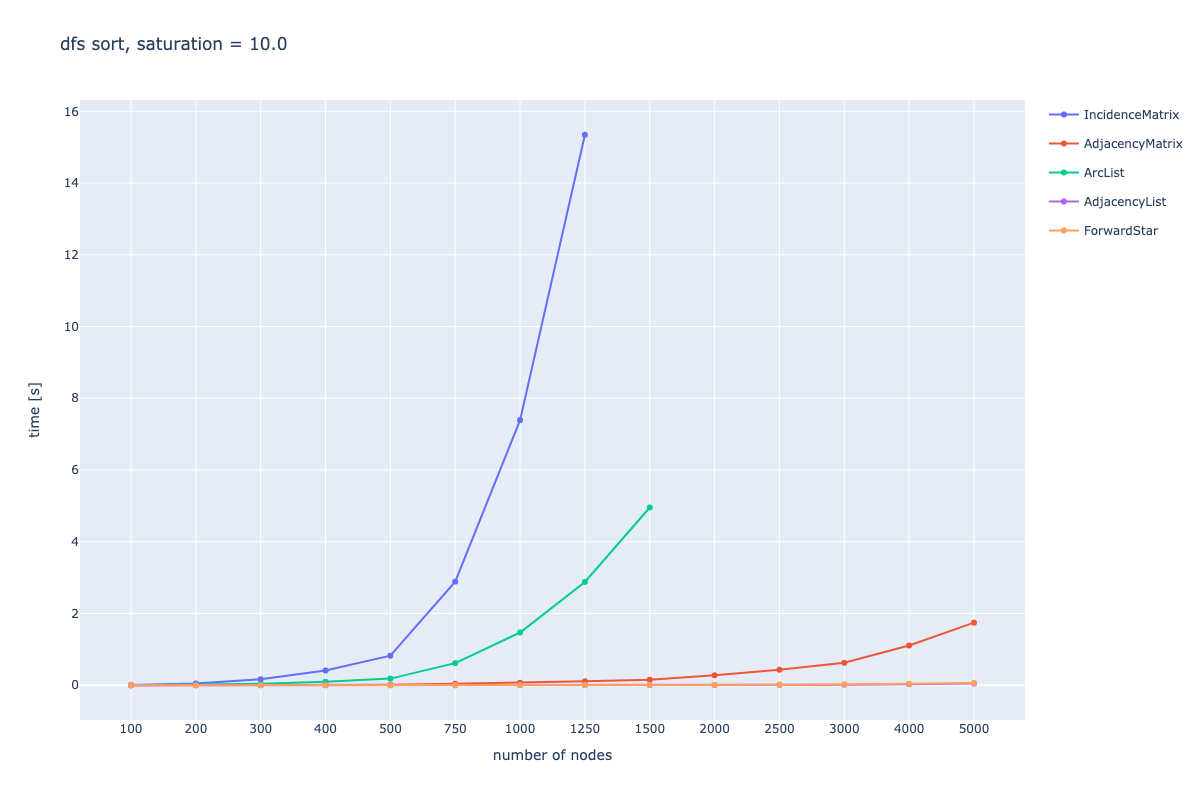

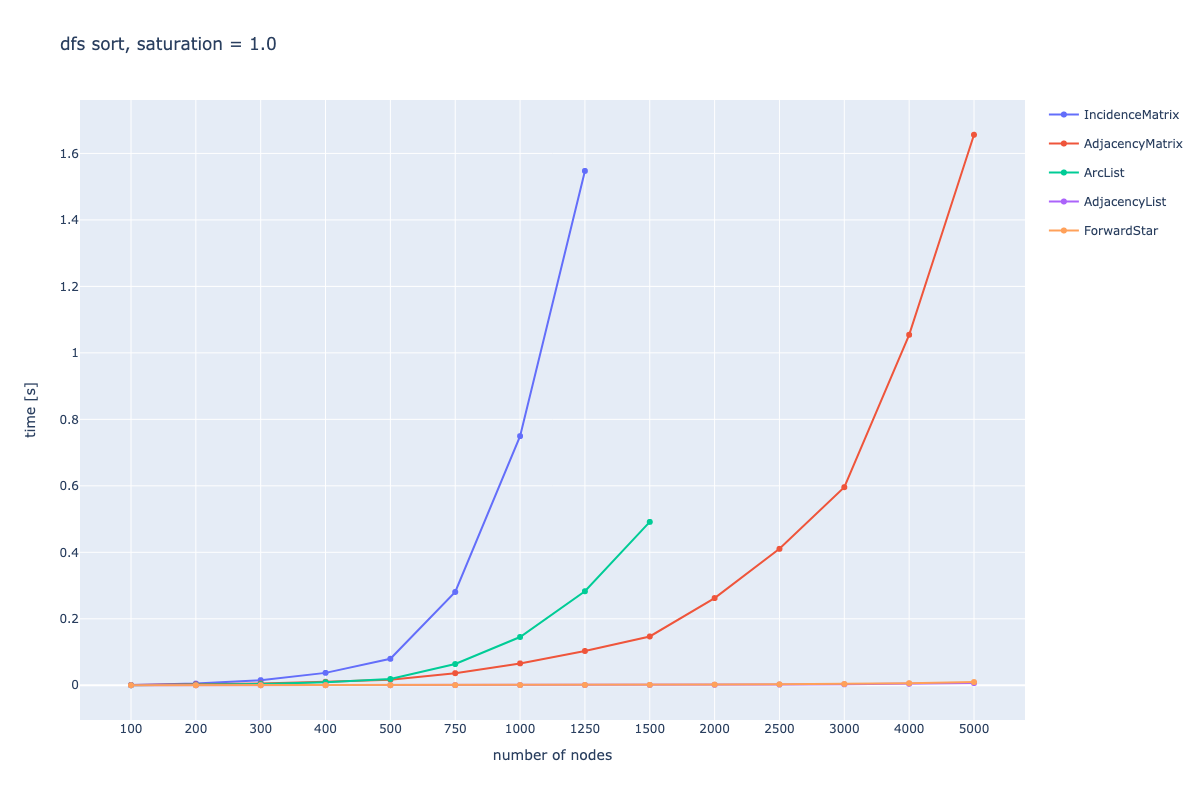

In [13]:
#dfs sort
paths = glob("graphs/dfs sort*")
paths.sort(key = lambda x: float(x.split()[-1].strip(".png")), reverse=True)
for path in paths:
    display(Image(path))

### Conclusions:

1. Overall dfs based topological sort performs better or at least as well as kahn sort, the diffrence could be even bigger if out implementation wasnt recursive
2. For both sorts the quickest is to sort Forward Star and Adjacancy List, For highly saturated Adjacancy Matrix performs similarly
3. In our case Adjacancy List performs slighly better than Forward star, its probably that way because GetSuccessors in Forward star creates a new list
4. The best for memory are Adjacancy list and Forward star. However if the graph has many edges but only a few arcs, Arc list can be more memory effecient
